In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use("ggplot")

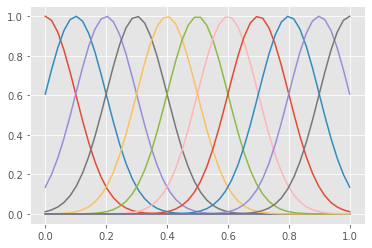

In [2]:
#パラメータを12とする
#1はバイアス
def phi(x):
    h = 0.1
    return np.append(1, np.exp(-(x - np.arange(0, 1.1, 0.1))**2/(2*h **2)))
 
X = np.linspace(0, 1)
Y = np.array([phi(x) for x in X])
for i in range(1, 12):
    plt.plot(X, Y.T[i])

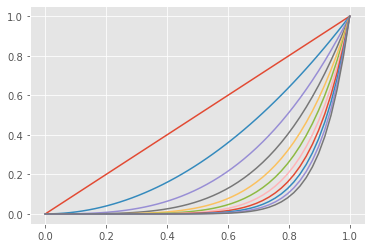

In [4]:
def phi(x):
    m = 12
    return x **  np.arange(0, m)
 
X = np.linspace(0, 1)
Y = np.array([phi(x) for x in X])
for i in range(1, 12):
    plt.plot(X, Y.T[i])

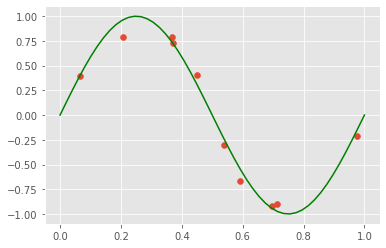

In [40]:
n = 10
X = np.random.uniform(0, 1, n)
T = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, n)
plt.scatter(X, T)
plt.plot(np.linspace(0,1), np.sin(2 * np.pi * np.linspace(0,1)), c ="g")
plt.show()

In [41]:
#計画行列をつくる
Phi = np.array([phi(x) for x in X])
 
#ハイパーパラメータ
alpha = 0.1
beta = 9.0
M = 12

In [53]:
X

array([0.20802509, 0.44930973, 0.53839264, 0.9751507 , 0.37069529,
       0.36687187, 0.71226963, 0.59200282, 0.06473135, 0.69666963])

In [37]:
#事後確率の分散
S = np.linalg.inv(alpha * np.eye(M) + beta * Phi.T.dot(Phi))
#事後確率の平均
m = beta * S.dot(Phi.T).dot(T)

In [38]:
def sigma(x):
    return 1.0/ beta + phi(x).dot(S).dot(phi(x))
 
def norm(x,t):
    return stats.norm(m.dot(phi(x)), sigma(x)).pdf(t)

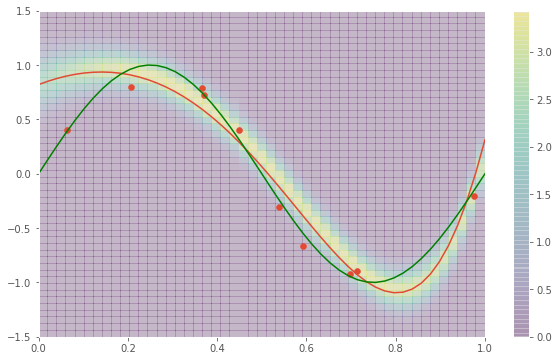

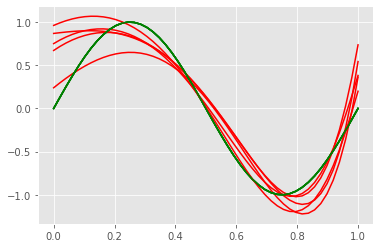

In [68]:
x_, y_ = np.meshgrid(np.linspace(0,1), np.linspace(-1.5, 1.5))
Z = np.vectorize(norm)(x_,y_)
x = np.linspace(0,1)
y = [m.dot(phi(x__)) for x__ in x]
 
plt.figure(figsize=(10,6))
plt.pcolor(x_, y_, Z, alpha = 0.2)
plt.colorbar()
plt.scatter(X, T)
#予測分布の平均
plt.plot(x, y)
#本物の分布
plt.plot(np.linspace(0,1), np.sin(2 * np.pi * np.linspace(0,1)), c ="g")
plt.show()
 
#事後分布から得られるパラメータのサンプル
m_list = [np.random.multivariate_normal(m, S) for i in range(5)]
 
for m_ in m_list:
    x = np.linspace(0,1)
    y = [m_.dot(phi(x__)) for x__ in x]
    plt.plot(x, y, c = "r")
    plt.plot(np.linspace(0,1), np.sin(2 * np.pi * np.linspace(0,1)), c ="g")

In [70]:
y

[0.961350379916495,
 0.990870864044912,
 1.0160135281193428,
 1.0365102766274148,
 1.0520960389777179,
 1.0625109749328132,
 1.067502765866797,
 1.0668290277678738,
 1.0602598885042622,
 1.0475807775942574,
 1.0285954812949705,
 1.0031295189691993,
 0.9710338981200058,
 0.9321893049055137,
 0.8865107840636257,
 0.83395295668289,
 0.7745158158405705,
 0.7082511284747431,
 0.6352694566402941,
 0.5557477921892723,
 0.4699377755779821,
 0.3781744415941562,
 0.28088540196897455,
 0.1786003367356478,
 0.07196062245777393,
 -0.03827112429073839,
 -0.15120186593024237,
 -0.265799665974663,
 -0.3808863248523627,
 -0.4951316176267467,
 -0.6070497072794782,
 -0.7149984010420887,
 -0.8171820198339875,
 -0.9116587626037476,
 -0.9963535686996399,
 -1.0690776127446489,
 -1.1275557082965662,
 -1.169463049277766,
 -1.1924728822103354,
 -1.1943168781453506,
 -1.1728601612912588,
 -1.1261931521929363,
 -1.0527425973636861,
 -0.9514043850068926,
 -0.8217009883686837,
 -0.663966634829626,
 -0.4795635705714